In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf

# Model Architecture

In [2]:
def build_lstm_model(input_dim=1):
    model = Sequential()
    model.add(LSTM(units=50, input_shape=(None, input_dim)))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Read data

In [3]:
data_path = "Data/COALINDIA TRAIN.csv"  # Replace with the path to your stock market data
epochs = 50
data = pd.read_csv(data_path)

# Checking null values

In [4]:
data.isna().sum()

Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64

# Dropping duplicate values

In [5]:
data.dropna(inplace=True)

In [6]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2011,315.500000,318.000000,314.549988,317.299988,129.144241,2929118.0
1,04-01-2011,318.899994,320.000000,316.049988,319.200012,129.917557,2716995.0
2,05-01-2011,320.000000,320.000000,308.250000,309.799988,126.091690,8555905.0
3,06-01-2011,311.000000,313.000000,308.500000,309.100006,125.806793,2763146.0
4,07-01-2011,310.000000,313.500000,302.149994,309.100006,125.806793,2298583.0
...,...,...,...,...,...,...,...
2960,26-12-2022,215.050003,221.600006,214.250000,220.750000,215.474915,3116608.0
2961,27-12-2022,222.000000,222.899994,219.649994,221.250000,215.962967,2961726.0
2962,28-12-2022,221.250000,224.250000,220.550003,223.199997,217.866364,3015714.0
2963,29-12-2022,220.800003,224.350006,220.449997,221.649994,216.353394,4784105.0


# Preparing Data

In [7]:
data = data[['Close']]
data = np.array(data).astype(float)

In [8]:
data.shape

(2959, 1)

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [10]:
data.shape

(2959, 1)

In [11]:
sequence_length = 10
X_train, Y_train = [], []
for i in range(len(data) - sequence_length):
    X_train.append(data[i:i+sequence_length])
    Y_train.append(data[i+sequence_length])
    
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [12]:
X_train.shape

(2949, 10, 1)

In [13]:
Y_train.shape

(2949, 1)

In [14]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Model Training

In [15]:
model = build_lstm_model()

In [16]:
model.fit(X_train, Y_train, epochs=epochs, batch_size=32)

Epoch 1/50
93/93 [==============================] - 2s 3ms/step - loss: 0.0095
Epoch 2/50
93/93 [==============================] - 0s 3ms/step - loss: 6.6471e-04
Epoch 3/50
93/93 [==============================] - 0s 3ms/step - loss: 6.1285e-04
Epoch 4/50
93/93 [==============================] - 0s 3ms/step - loss: 6.6322e-04
Epoch 5/50
93/93 [==============================] - 0s 3ms/step - loss: 5.3246e-04
Epoch 6/50
93/93 [==============================] - 0s 3ms/step - loss: 5.6726e-04
Epoch 7/50
93/93 [==============================] - 0s 3ms/step - loss: 4.9138e-04
Epoch 8/50
93/93 [==============================] - 0s 3ms/step - loss: 4.7693e-04
Epoch 9/50
93/93 [==============================] - 0s 3ms/step - loss: 4.8077e-04
Epoch 10/50
93/93 [==============================] - 0s 3ms/step - loss: 3.9166e-04
Epoch 11/50
93/93 [==============================] - 0s 3ms/step - loss: 4.0575e-04
Epoch 12/50
93/93 [==============================] - 0s 3ms/step - loss: 3.7863e-04
Epoch

# Model Testing

In [17]:
test_data_path = "Data/COALINDIA TEST.csv"  
test_data = pd.read_csv(test_data_path)

In [18]:
test_data.isna().sum()

Date         186
Open         186
High         186
Low          186
Close        186
Adj Close    186
Volume       186
dtype: int64

In [19]:
test_data.dropna(inplace=True)

In [20]:
test_data = test_data[['Close']]
test_data = np.array(test_data).astype(float)

In [21]:
test_data = scaler.fit_transform(test_data)

In [22]:
sequence_length = 10
X_test, Y_test = [], []
for i in range(len(test_data) - sequence_length):
    X_test.append(test_data[i:i+sequence_length])
    Y_test.append(test_data[i+sequence_length])
    
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [23]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [24]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 0s/step


In [25]:
y_test = scaler.inverse_transform(Y_test)
y_pred = scaler.inverse_transform(y_pred)

# Error Metrics

In [26]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error: 2.0482764551156873
Mean Squared Error: 6.7270452035628425
Root Mean Squared Error: 2.5936547965299552
R-squared (R2) Score: 0.7592727291210201


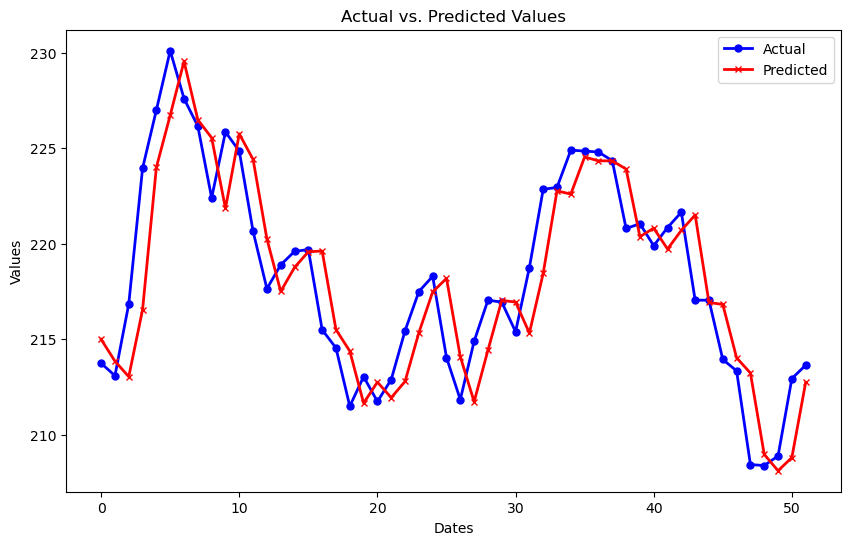

In [28]:
#x = data[['Date']]
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue', marker='o', markersize=5, linewidth=2)
plt.plot(y_pred, label='Predicted', color='red', marker='x', markersize=5, linewidth=2)

# Set axis labels and title
plt.xlabel('Dates')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')

# Add legend
plt.legend()

# Show the plot
plt.show()
